In [3]:
import warnings
import matplotlib.animation as animation 
from IPython import display 
import numpy as np
import h5py
import matplotlib.pyplot as plt

In [4]:
#from phi.flow import *  # minimal dependencies
# from phi.torch.flow import *
# from phi.tf.flow import *

from phi.jax.flow import *
jax.devices()

2024-08-08 03:23:29.537842: W external/xla/xla/service/gpu/nvptx_compiler.cc:765] The NVIDIA driver's CUDA version is 12.2 which is older than the ptxas CUDA version (12.6.20). Because the driver is older than the ptxas version, XLA is disabling parallel compilation, which may slow down compilation. You should update your NVIDIA driver or use the NVIDIA-provided CUDA forward compatibility packages.


[cuda(id=0)]

In [28]:
"""Karman Vortex Street
Air flow around a static cylinder.
Vortices start appearing after a couple of hundred steps.
"""


SPEED    = vis.control(2.)
velocity = StaggeredGrid((SPEED, 0), ZERO_GRADIENT, x=128, y=128, bounds=Box(x=128*3, y=64*3))
CYLINDER = Obstacle(geom.infinite_cylinder(x=15, y=32, radius=5, inf_dim=None))
BOUNDARY_MASK = StaggeredGrid(Box(x=(-INF, 0.5), y=None), velocity.extrapolation,
                              velocity.bounds, velocity.resolution)
pressure = None


@jit_compile  # Only for PyTorch, TensorFlow and Jax
def step(v, p, dt=1.):
    v = advect.semi_lagrangian(v, v, dt)
    v = v * (1 - BOUNDARY_MASK) + BOUNDARY_MASK * (SPEED, 0)
    return fluid.make_incompressible(v, [CYLINDER], Solve('auto', 1e-5, x0=p))



In [59]:

for i in range(5000):
    velocity, pressure = step(velocity, pressure)
    
vorticity = field.curl(velocity)



<Figure size 1200x500 with 2 Axes>

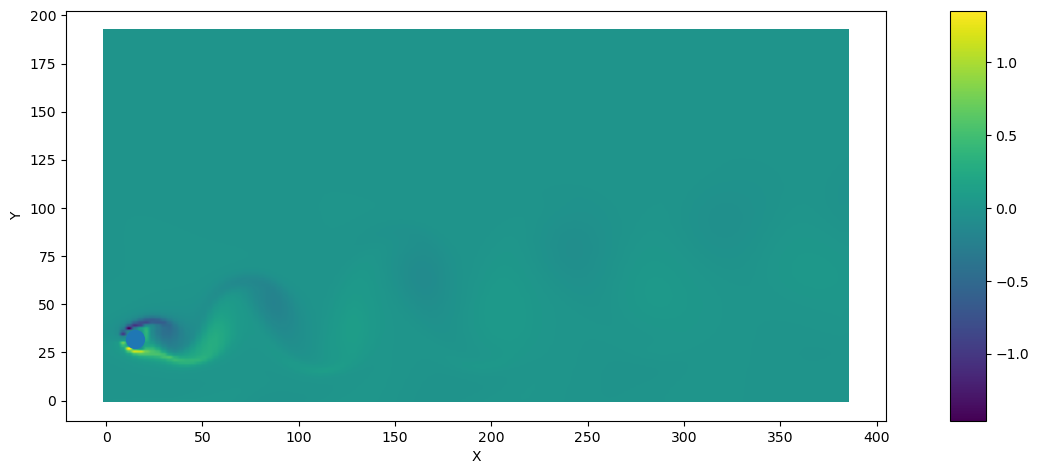

In [60]:
vis.plot(vis.overlay(vorticity,CYLINDER.geometry))


<Figure size 1200x500 with 2 Axes>

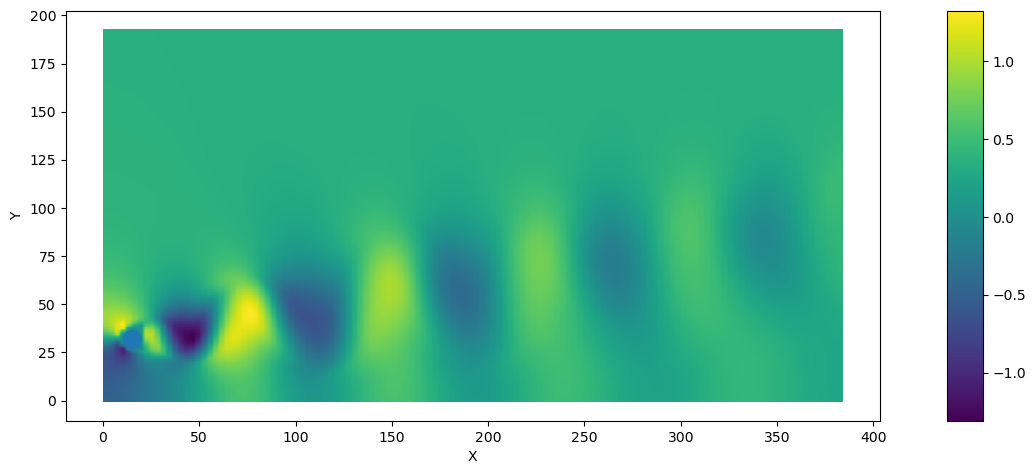

In [63]:
vis.plot(vis.overlay(velocity['y'],CYLINDER.geometry))

In [61]:
# hf = h5py.File("Cyl-Flow-Data.h5", "w")


# for source in sources:

#     print('source at ', source)


#     @jit_compile  # Only for PyTorch, TensorFlow and Jax
#     def step(v, s, p, dt=1.):
#         s = advect.mac_cormack(s, v, dt) + inflow
#         buoyancy = resample(s * (0.0, 0.1), to=v)
#         v = advect.semi_lagrangian(v, v, dt) + buoyancy * dt
#         v, p = fluid.make_incompressible(v, Walls, Solve('auto', 1e-4, 0, x0=p))
#         return v, s, p
    
    
#     velocity = StaggeredGrid(0, x=Res, y=Res, bounds=Box(x=100, y=100))  # or CenteredGrid(...)
#     smoke    = CenteredGrid(0, ZERO_GRADIENT, x=2*Res, y=2*Res, bounds=Box(x=100, y=100))
#     inflow   = 0.05 * resample(Sphere(x=source[0], y=source[1], radius=5), to=smoke, soft=True)
#     pressure = None
    
    
#     trajectory = [smoke]

#     for _ in range(500):
#         velocity, smoke, pressure = step(velocity, smoke, pressure)
#         trajectory.append(smoke)
#         #     plot(vis.overlay(smoke,Walls.geometry), alpha=1, show_color_bar=False, animate='time')
#     trajectory = field.stack(trajectory, batch('time'))
#     g = hf.create_group(name = 'x-{}-y-{}'.format(source[0], source[1]))
#     g.create_dataset('density', data=trajectory.uniform_values().numpy('time,x,y,vector'))
#     g.attrs['SourcePosition'] = source


# hf.close()

In [62]:
# hf = h5py.File("temp.h5", "r")
# names = hf.keys()
# print(names)

In [116]:
# plot(vis.overlay(gridQ,Walls.geometry), alpha=1,
#      show_color_bar=False, animate='time')

In [12]:
# p.save('Smoke-x-20.mp4')